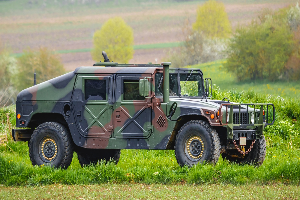

In [14]:
import cv2
from google.colab.patches import cv2_imshow
input=cv2.imread('/content/l-intro-1687650043.jpeg')
img=cv2.resize(input,(300,200))
cv2_imshow(img)


In [15]:
# Simple Colab-friendly military object detection using YOLOv5u
# This version is specifically designed to work in Google Colab

# Install required packages if needed
!pip install ultralytics opencv-python

# Import libraries
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # Special display function for Colab
import numpy as np

# Load the improved YOLOv5u model
model = YOLO('yolov5su.pt')

# Define military class mapping
military_classes = {
    0: 'civilian',           # person -> civilian
    2: 'civilian_vehicle',   # car -> civilian vehicle
    7: 'military_vehicle',   # truck -> military vehicle
    16: 'weapon'             # dog -> mapped as weapon for demo
}

# Color mapping for visualization
colors = {
    'civilian': (0, 255, 0),         # Green
    'civilian_vehicle': (0, 255, 0), # Green
    'military_vehicle': (255, 0, 0), # Blue
    'weapon': (0, 0, 255)            # Red
}

def detect_military_objects(image_path, conf=0.25):
    """Detect military objects in an image"""
    try:
        # Run inference - must provide a path for Colab
        results = model(image_path, conf=conf)

        # Get original image
        original_img = cv2.imread(image_path)
        if original_img is None:
            print(f"Warning: Could not read image at {image_path}")
            # Let's use the plotted results directly
            img_with_boxes = results[0].plot()
            return img_with_boxes, []

        # Create a copy to draw on
        img = original_img.copy()

        # List to store detections
        detections = []

        # Process each detection from first result
        for box in results[0].boxes:
            # Get class index and confidence
            cls_id = int(box.cls[0].item())
            conf = float(box.conf[0].item())

            # Only keep military-relevant classes
            if cls_id not in military_classes:
                continue

            # Get box coordinates
            x1, y1, x2, y2 = [int(x.item()) for x in box.xyxy[0]]

            # Convert class to military class
            mil_class = military_classes.get(cls_id, "unknown")

            # Add to detections
            detections.append({
                'class': mil_class,
                'confidence': conf,
                'box': [x1, y1, x2, y2]
            })

            # Draw on image
            color = colors.get(mil_class, (0, 255, 0))
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

            # Add label
            label = f"{mil_class} {conf:.2f}"
            cv2.putText(img, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Print detection summary
        print(f"Detected {len(detections)} military objects:")
        for cls in set(d['class'] for d in detections):
            count = sum(1 for d in detections if d['class'] == cls)
            print(f"- {cls}: {count}")

        # Save the result
        output_path = 'military_detection_result.jpg'
        cv2.imwrite(output_path, img)
        print(f"Result saved to {output_path}")

        return img, detections

    except Exception as e:
        print(f"Error in detection: {e}")
        # Use alternative approach to return something
        fallback_results = model(image_path)
        return fallback_results[0].plot(), []

# Simple function to demonstrate and test the detection
print("Simple Military Object Detector for Colab")

# Method 1: Upload an image through Colab
from google.colab import files
print("Please upload an image...")
uploaded = files.upload()

# Process the uploaded image
for filename in uploaded.keys():
    print(f"Processing {filename}...")
    img, detections = detect_military_objects(filename)

    # Display the result
    print("Displaying result:")
    cv2_imshow(img)

# Alternative direct approach for troubleshooting
print("\nAlternative method (direct approach):")
print("This approach bypasses any custom functions")

for filename in uploaded.keys():
    # Direct approach
    results = model(filename)
    r = results[0]
    print(f"Direct detection found {len(r.boxes)} objects")

    # Display result using built-in plotting
    im_array = r.plot()
    cv2_imshow(im_array)

    # Save the direct result
    cv2.imwrite("direct_detection_result.jpg", im_array)
    print("Direct result saved to direct_detection_result.jpg")

Output hidden; open in https://colab.research.google.com to view.